In [1]:
%matplotlib inline
%matplotlib widget

Short introduction to stochastic optimization
===

1 Random search
---

Classical example: **Rosenbrock function** (see also ```scipy.optimize.rosen()```):

$f(x, y)=(a-x)^2+B(y-x^2)^2$

In [2]:
def rosenbrock(x, y, a=1, B=100):
      return (a-x)**2 + B*((y-x**2))**2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import math

In [4]:
def plot_2d(X, Y, Z):
    fig = plt.figure(figsize=(8, 6))
    cs = plt.contourf(X, Y, Z, cmap=cm.nipy_spectral)
    fig.colorbar(cs)
    plt.show()
    
def plot_3d(X, Y, Z):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf)
    plt.show()

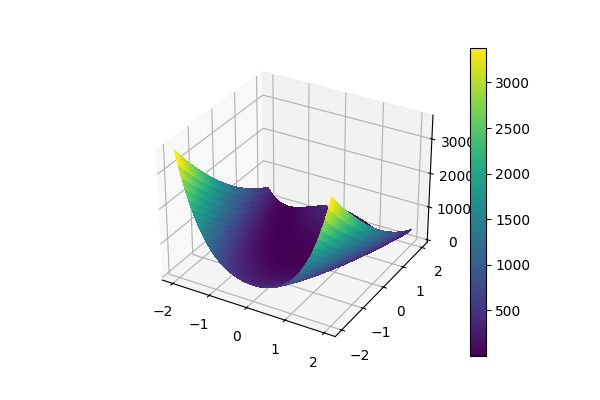

In [5]:
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)
plot_3d(X, Y, Z)

1.1 Pure Random Search
---

Implement the PRS algorithm and apply it to finding minimum of Rosenbrock function on $[-2,2]^2.$

In [10]:
def PRS_2d(f, x_range=(0,1), y_range=(0,1), n_iter=100): 
    # f a 2D function to minimize
    # x_range: [x_min, x_max] interval
    # y_range: [y_min, y_max] interval
    
    xy = []  # successive temporary solutions
    fs = []  # values of f as improved over iterations
    min_f = np.Inf
    #
    #............
    #
    return xy, fs

In [18]:
# optimize
n_iter = 10000
xy, fs = PRS_2d(rosenbrock, (-2,2), (-2,2), n_iter)

The global minimum for the Rosenbrock function is $(a, a^2)$ for which the function is zero. Plot the successive
values of the function and check the solution (xy).

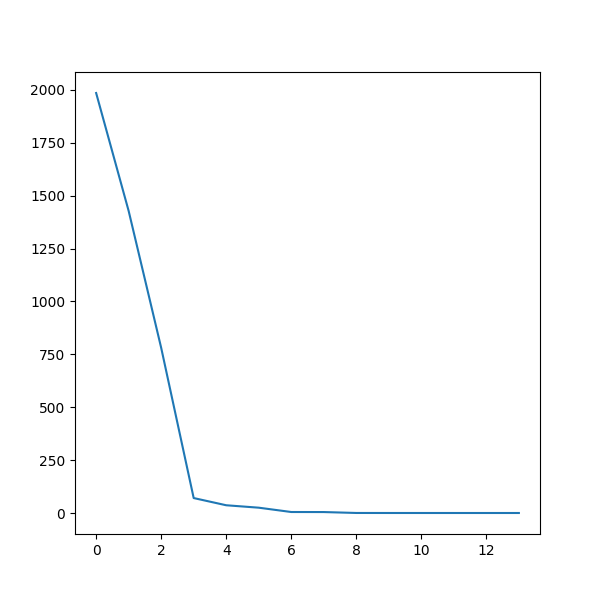

In [19]:
fig = plt.figure(figsize=(6,6))
plt.plot(fs)

In [23]:
xy

[(-1.6350900450631554, -1.7748253008556105),
 (1.532829352462664, -1.4289819199897567),
 (1.3493349459227977, -0.973972862790915),
 (0.6881867856107995, -0.36658729618514174),
 (-0.04280673117314704, -0.5940980076084723),
 (-0.3015268940176763, 0.5750469953716344),
 (0.40942302041010414, 0.37614437126529987),
 (-1.033387675773993, 1.1244589546858665),
 (0.7310273637600866, 0.564771145686136),
 (1.016118618878953, 1.0533577142808883),
 (1.1298937519415495, 1.284305063264644),
 (1.1230070913129402, 1.2657094473568544),
 (0.9072183174250124, 0.8208030661646109),
 (0.9478877960023295, 0.9013611024016943)]

2 Simulated annealing
---

Visualization of the acceptance/rejection probability (when $f(x)=1$):

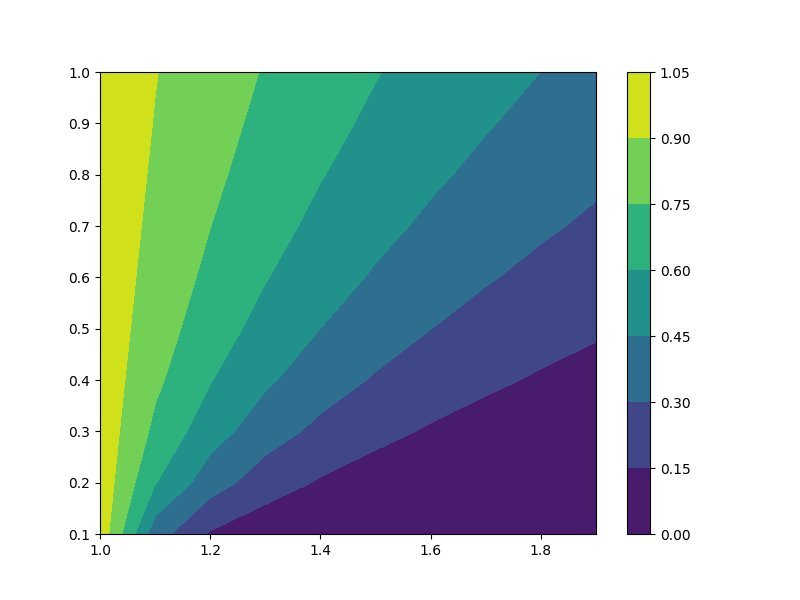

In [24]:
fx = np.arange(1.0, 2.0, 0.1)
T = np.arange(1.0, 0.0, -0.1)
X, Y = np.meshgrid(fx, T)
proba = lambda fx, T :np.exp(-(fx - 1) / T)
Z = proba(X, Y)
fig = plt.figure(figsize=(8, 6))
cs = plt.contourf(X, Y, Z)
fig.colorbar(cs)
plt.show()

In [46]:
def SA_2d(f, n_iter):
    # Simple simulated annealing procedure for continuous 2d functions
    x = np.random.normal(0, 1, 2)  # 2 values, normally distributed
    fx = f(x[0], x[1])
    fbest = fx
    xbest = np.copy(x)

    fs = []  # keep track of estimations of f()
    
    for i in range(n_iter):
        #.......
        fs.append(fbest)

    return xbest, fs

In [43]:
xb, fs = SA_2d(rosenbrock, 1000000)

In [47]:
xb

array([1.01793856, 1.03651556])

In [56]:
himmelblau = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2
# see: https://en.wikipedia.org/wiki/Himmelblau%27s_function

3 Other examples
---

Using the package '''stochopy''', the optimization of above functions is a one-liner:

In [48]:
from stochopy.optimize import minimize

In [51]:
# the function is expected to accept a vector as x, so we
# need to redefine it
def rosenbrock2(x):
   x = np.asarray(x)
   sum1 = ((x[1:] - x[:-1] ** 2) ** 2).sum()
   sum2 = np.square(1.0 - x[:-1]).sum()
   return 100.0 * sum1 + sum2
    
x = minimize(rosenbrock2, 
             [[-5.12, 5.12], [-5.12, 5.12]] , 
             method="cmaes", 
             options={"maxiter": 100, "popsize": 10, "seed": 0})

In [52]:
x

     fun: 3.862267649355231e-09
 message: 'best solution value is lower than ftol'
    nfev: 490
     nit: 49
  status: 1
 success: True
       x: array([0.99997096, 0.99993643])

In [53]:
def himmelblau2(x_):
    x, y = x_[0], x_[1] 
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [54]:
x = minimize(himmelblau2, 
             [[2, 4], [1, 3]] , 
             method="cmaes", 
             options={"maxiter": 100, "popsize": 10, "seed": 0})

In [55]:
x

     fun: 2.3315652064854176e-10
 message: 'best solution value is lower than ftol'
    nfev: 310
     nit: 31
  status: 1
 success: True
       x: array([2.99999856, 1.9999977 ])